In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# Load and Check Data

In [72]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_PassengerId = test_df["PassengerId"]

In [73]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [74]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [76]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Categorical Variables Analises

In [77]:
def bar_plot(variable):
    var = train_df[variable]
    varValue = var.value_counts()
    
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{} : \n {}".format(variable,varValue))
    

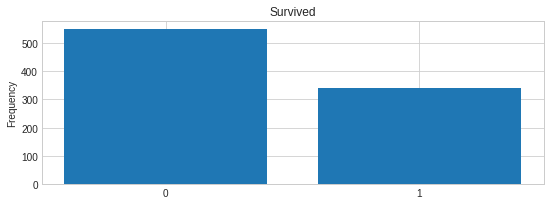

Survived : 
 0    549
1    342
Name: Survived, dtype: int64


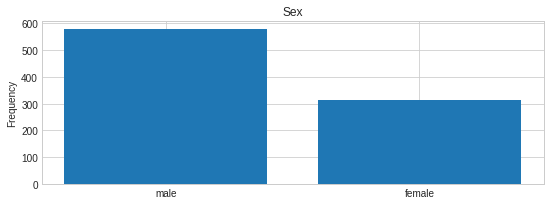

Sex : 
 male      577
female    314
Name: Sex, dtype: int64


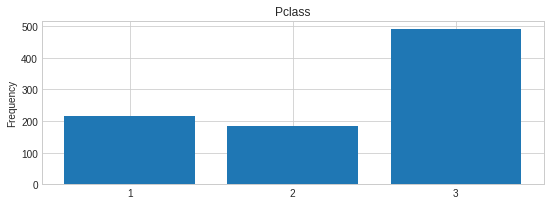

Pclass : 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


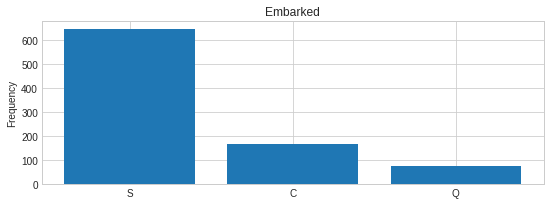

Embarked : 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


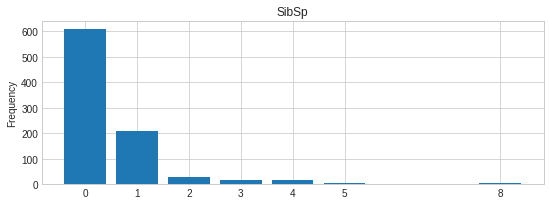

SibSp : 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


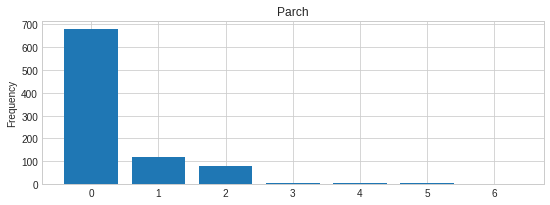

Parch : 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [78]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

# Numerical Variables Analises

In [79]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable],bins=10)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.show()

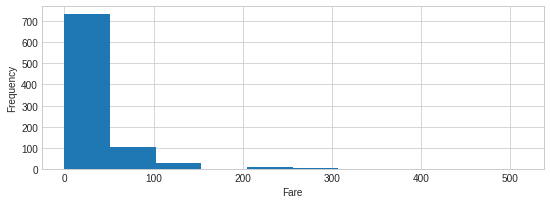

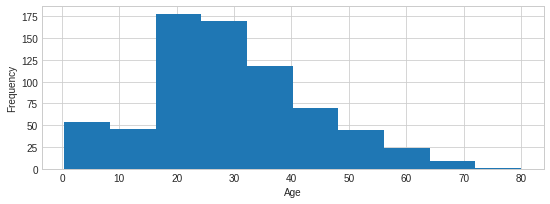

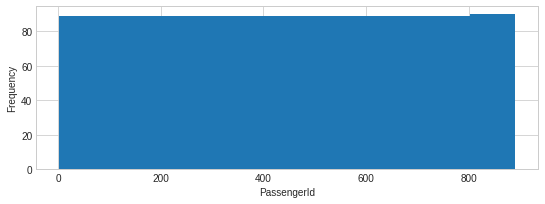

In [80]:
numericVar = ["Fare","Age","PassengerId"]
for n in numericVar:
    plot_hist(n)
    

# Basic Data Analises

In [81]:
# Pclass- Survived 
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [82]:
# Sex- Survived 
train_df[["Sex","Survived"]].groupby(["Sex"],as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [83]:
# Sibsp- Survived 
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index = False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [84]:
# Parch- Survived 
train_df[["Parch","Survived"]].groupby(["Parch"],as_index = False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Outlier Detection 

In [85]:
def detect_outliers(df,features):
    outlier_indices =[]
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quantile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3 - Q1
        #Outlier Step
        outlier_step = IQR * 1.5
        #detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices =Counter(outlier_indices)
    multiple_outliers = list(i for i ,v in outlier_indices.items() if v > 2)
    
    return multiple_outliers
        
        

In [86]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [87]:
#drop outliers
train_df  =train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop=True)

# Missing Valeues 

In [88]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis=0).reset_index(drop = True)

In [89]:
train_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [90]:
#Find Missing Values
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Survived'], dtype='object')

In [91]:
train_df.isnull().sum()

Age             256
Cabin          1007
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [92]:
# Fill Missing Values
train_df[train_df["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
60,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
821,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


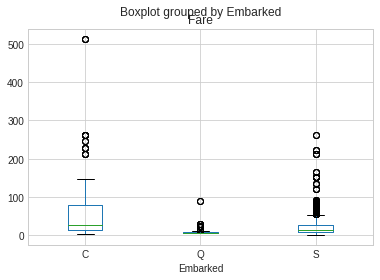

In [93]:
train_df.boxplot(column="Fare",by="Embarked")
plt.show()

In [94]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [95]:
train_df[train_df["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1033,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [96]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"]==3]["Fare"]))
train_df[train_df["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


# Correlation and Visualizition

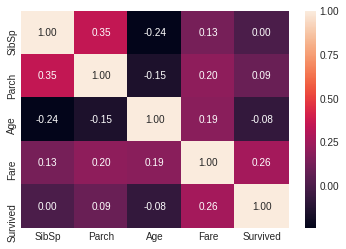

In [97]:
list1 = ["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(train_df[list1].corr(),annot = True ,fmt=".2f")
plt.show()

## SibSp -- Survived

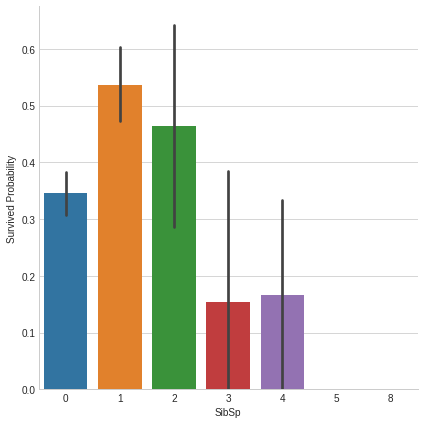

In [98]:
g = sns.factorplot(x = "SibSp",y = "Survived",data = train_df,kind = "bar",size = 6)
g.set_ylabels("Survived Probability")
plt.show()

## Parch -- Survived

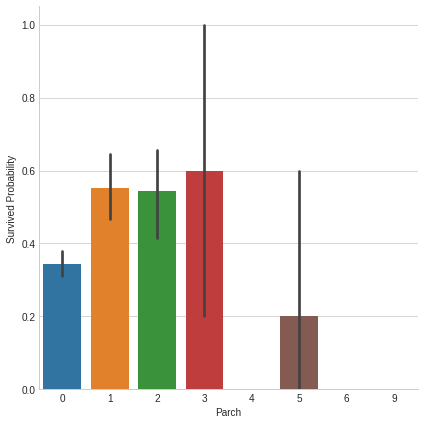

In [99]:
g = sns.factorplot(x = "Parch",y = "Survived", data = train_df, kind = "bar",size = 6)
g.set_ylabels("Survived Probability")
plt.show()

## Pclass -- Survived

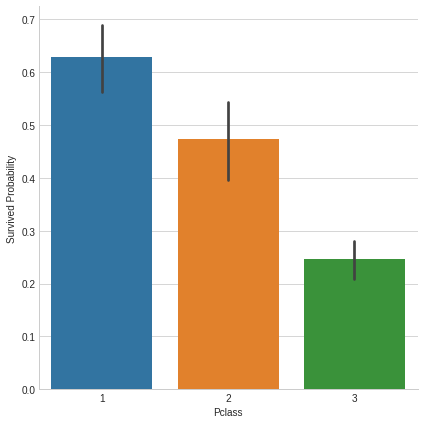

In [100]:
g = sns.factorplot(x = "Pclass",y = "Survived",data = train_df,kind = "bar",size = 6)
g.set_ylabels("Survived Probability")
plt.show()

## Age -- Survived

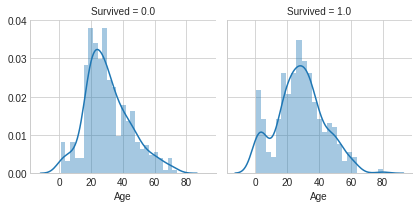

In [101]:
g = sns.FacetGrid(data=train_df,col="Survived")
g.map(sns.distplot,"Age",bins =25)
plt.show()

## Pclass - Survived -- Age

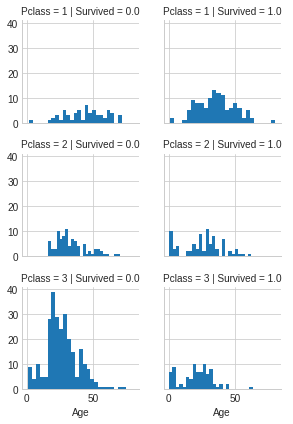

In [102]:
g = sns.FacetGrid(data = train_df,col = "Survived",row = "Pclass",size = 2)
g.map(plt.hist,"Age",bins = 25)
g.add_legend()
plt.show()

## Embarked -- Sex -- Pclass -- Survived

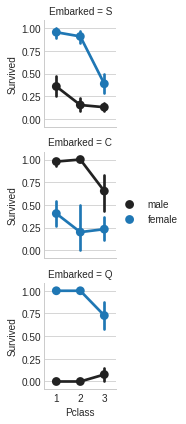

In [103]:
g = sns.FacetGrid(data = train_df , row = "Embarked",size = 2)
g.map(sns.pointplot,"Pclass","Survived","Sex")
g.add_legend()
plt.show()

## Embarked -- Sex -- Fare -- Survived

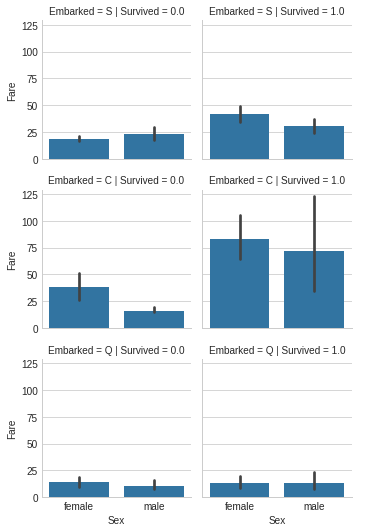

In [104]:
g = sns.FacetGrid(data = train_df , row = "Embarked" , col = "Survived" , size = 2.5)
g.map(sns.barplot,"Sex", "Fare")
g.add_legend()
plt.show()

## Fill Missing : Age Feature

In [105]:
train_df[train_df["Age"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
17,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1.0,244373
19,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1.0,2649
26,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,0.0,2631
27,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,1.0,330959
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,1300,3,female,0,NaN,334915
1291,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,1302,3,female,0,NaN,365237
1294,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1297,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


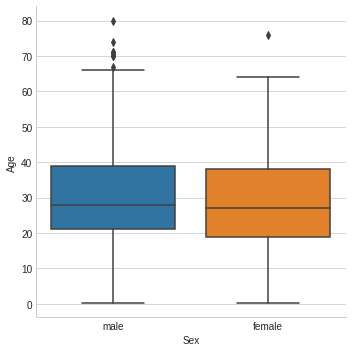

In [106]:
sns.factorplot(x = "Sex" , y = "Age" , data = train_df , kind = "box")
plt.show()

Sex is not informative for age prediction , age distribution seems to be same.

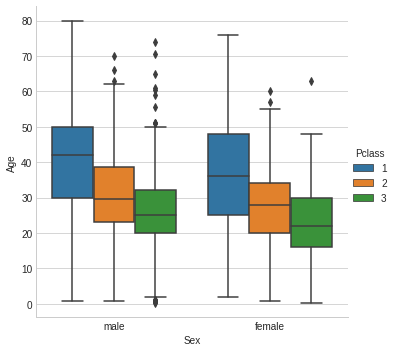

In [107]:
sns.factorplot(x = "Sex" , y = "Age" , hue = "Pclass", data = train_df , kind = "box")
plt.show()

1st class passengers are older than 2nd, and 2nd is older than 3rd class.

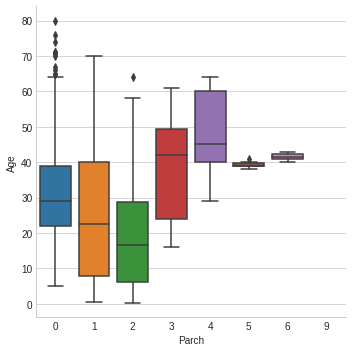

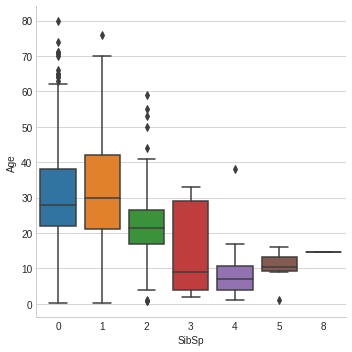

In [108]:
sns.factorplot(x = "Parch" , y = "Age" ,  data = train_df , kind = "box")
sns.factorplot(x = "SibSp" , y = "Age" ,  data = train_df , kind = "box")
plt.show()

In [109]:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]

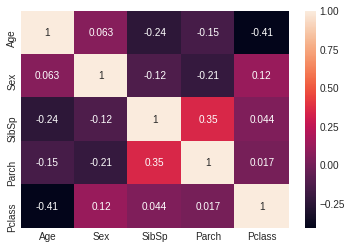

In [110]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(),annot=True)
plt.show()

Age is not correlated with sex but age is negatif correlated with parch, sibsp and pclass.

In [111]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [112]:
train_df[train_df["Age"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


# Feature Engineering

## Name -- Title

In [113]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [114]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [115]:
train_df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

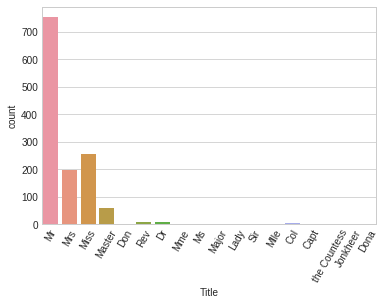

In [116]:
sns.countplot(x = "Title",data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [117]:
# convert to categorical
train_df["Title"] = train_df["Title"].replace(["Don","Rev","Dr","Major","Lady","Sir","Col","Capt","the Countess","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

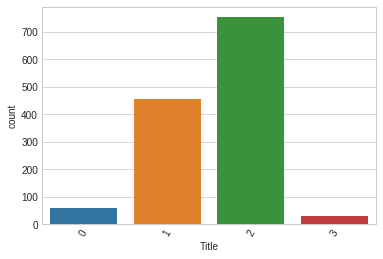

In [118]:
sns.countplot(x = "Title",data = train_df)
plt.xticks(rotation = 60)
plt.show()

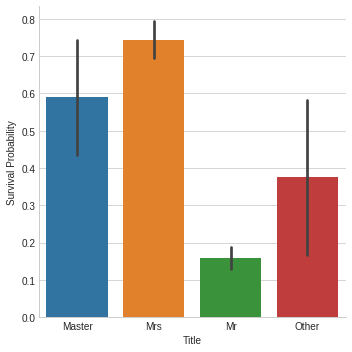

In [119]:
g = sns.factorplot(x = "Title",y= "Survived",data = train_df,kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [120]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True)
train_df.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,0,1,3,1,1,0.0,A/5 21171,2
1,38.0,C85,C,71.2833,0,2,1,0,1,1.0,PC 17599,1
2,26.0,NaN,S,7.9250,0,3,3,0,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,53.1000,0,4,1,0,1,1.0,113803,1
4,35.0,NaN,S,8.0500,0,5,3,1,0,0.0,373450,2


In [121]:
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3
0,22.0,NaN,S,7.2500,0,1,3,1,1,0.0,A/5 21171,0,0,1,0
1,38.0,C85,C,71.2833,0,2,1,0,1,1.0,PC 17599,0,1,0,0
2,26.0,NaN,S,7.9250,0,3,3,0,0,1.0,STON/O2. 3101282,0,1,0,0
3,35.0,C123,S,53.1000,0,4,1,0,1,1.0,113803,0,1,0,0
4,35.0,NaN,S,8.0500,0,5,3,1,0,0.0,373450,0,0,1,0


## Family Size

In [122]:
train_df["Fsize"] = train_df["Parch"] + train_df["SibSp"] + 1

In [123]:
train_df.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,Fsize
0,22.0,NaN,S,7.2500,0,1,3,1,1,0.0,A/5 21171,0,0,1,0,2
1,38.0,C85,C,71.2833,0,2,1,0,1,1.0,PC 17599,0,1,0,0,2
2,26.0,NaN,S,7.9250,0,3,3,0,0,1.0,STON/O2. 3101282,0,1,0,0,1
3,35.0,C123,S,53.1000,0,4,1,0,1,1.0,113803,0,1,0,0,2
4,35.0,NaN,S,8.0500,0,5,3,1,0,0.0,373450,0,0,1,0,1


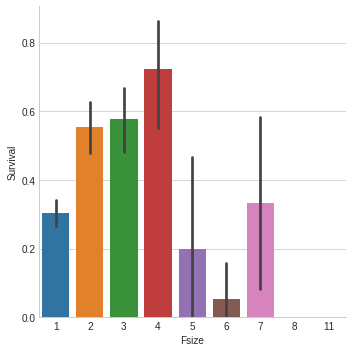

In [124]:
g = sns.factorplot(x = "Fsize", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [125]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]

In [126]:
train_df.head(10)

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,22.0,NaN,S,7.2500,0,1,3,1,1,0.0,A/5 21171,0,0,1,0,2,1
1,38.0,C85,C,71.2833,0,2,1,0,1,1.0,PC 17599,0,1,0,0,2,1
2,26.0,NaN,S,7.9250,0,3,3,0,0,1.0,STON/O2. 3101282,0,1,0,0,1,1
3,35.0,C123,S,53.1000,0,4,1,0,1,1.0,113803,0,1,0,0,2,1
4,35.0,NaN,S,8.0500,0,5,3,1,0,0.0,373450,0,0,1,0,1,1
5,25.0,NaN,Q,8.4583,0,6,3,1,0,0.0,330877,0,0,1,0,1,1
6,54.0,E46,S,51.8625,0,7,1,1,0,0.0,17463,0,0,1,0,1,1
7,2.0,NaN,S,21.0750,1,8,3,1,3,0.0,349909,1,0,0,0,5,0
8,27.0,NaN,S,11.1333,2,9,3,0,0,1.0,347742,0,1,0,0,3,1
9,14.0,NaN,C,30.0708,0,10,2,0,1,1.0,237736,0,1,0,0,2,1


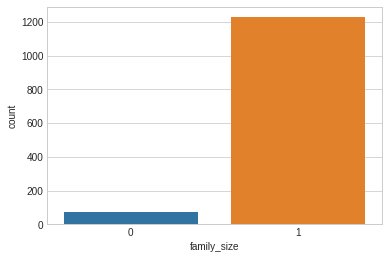

In [127]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

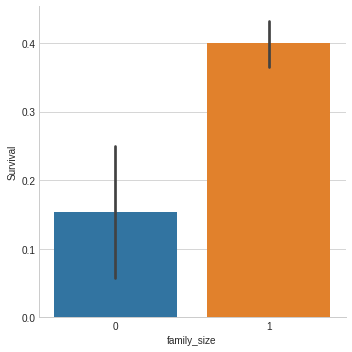

In [128]:
g = sns.factorplot(x = "family_size", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [129]:
train_df = pd.get_dummies(train_df, columns= ["family_size"])
train_df.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,22.0,NaN,S,7.2500,0,1,3,1,1,0.0,A/5 21171,0,0,1,0,2,0,1
1,38.0,C85,C,71.2833,0,2,1,0,1,1.0,PC 17599,0,1,0,0,2,0,1
2,26.0,NaN,S,7.9250,0,3,3,0,0,1.0,STON/O2. 3101282,0,1,0,0,1,0,1
3,35.0,C123,S,53.1000,0,4,1,0,1,1.0,113803,0,1,0,0,2,0,1
4,35.0,NaN,S,8.0500,0,5,3,1,0,0.0,373450,0,0,1,0,1,0,1


## Embarked

In [130]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

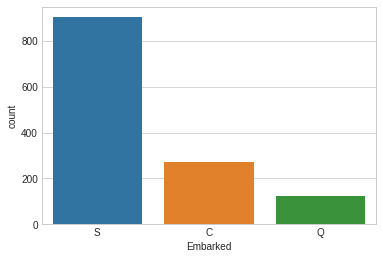

In [131]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

In [132]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,7.2500,0,1,3,1,1,0.0,A/5 21171,0,0,1,0,2,0,1,0,0,1
1,38.0,C85,71.2833,0,2,1,0,1,1.0,PC 17599,0,1,0,0,2,0,1,1,0,0
2,26.0,NaN,7.9250,0,3,3,0,0,1.0,STON/O2. 3101282,0,1,0,0,1,0,1,0,0,1
3,35.0,C123,53.1000,0,4,1,0,1,1.0,113803,0,1,0,0,2,0,1,0,0,1
4,35.0,NaN,8.0500,0,5,3,1,0,0.0,373450,0,0,1,0,1,0,1,0,0,1


## Ticket

In [133]:
train_df["Ticket"].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [134]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [135]:
train_df.head()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,7.2500,0,1,3,1,1,0.0,A5,0,0,1,0,2,0,1,0,0,1
1,38.0,C85,71.2833,0,2,1,0,1,1.0,PC,0,1,0,0,2,0,1,1,0,0
2,26.0,NaN,7.9250,0,3,3,0,0,1.0,STONO2,0,1,0,0,1,0,1,0,0,1
3,35.0,C123,53.1000,0,4,1,0,1,1.0,x,0,1,0,0,2,0,1,0,0,1
4,35.0,NaN,8.0500,0,5,3,1,0,0.0,x,0,0,1,0,1,0,1,0,0,1


In [136]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "T")
train_df.head(10)


,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,22.0,NaN,7.2500,0,1,3,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,C85,71.2833,0,2,1,0,1,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,NaN,7.9250,0,3,3,0,0,1.0,0,...,0,0,0,0,1,0,0,0,0,0
3,35.0,C123,53.1000,0,4,1,0,1,1.0,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,NaN,8.0500,0,5,3,1,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
5,25.0,NaN,8.4583,0,6,3,1,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
6,54.0,E46,51.8625,0,7,1,1,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
7,2.0,NaN,21.0750,1,8,3,1,3,0.0,1,...,0,0,0,0,0,0,0,0,0,1
8,27.0,NaN,11.1333,2,9,3,0,0,1.0,0,...,0,0,0,0,0,0,0,0,0,1
9,14.0,NaN,30.0708,0,10,2,0,1,1.0,0,...,0,0,0,0,0,0,0,0,0,1


## Pclass

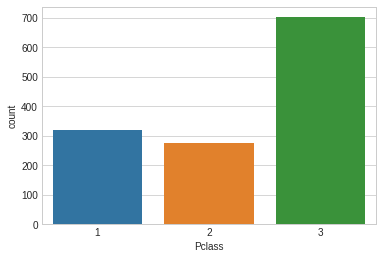

In [137]:
sns.countplot(x = "Pclass", data = train_df)
plt.show()

In [138]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns= ["Pclass"])
train_df.head()

,Age,Cabin,Fare,Parch,PassengerId,Sex,SibSp,Survived,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,22.0,NaN,7.2500,0,1,1,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,C85,71.2833,0,2,0,1,1.0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,26.0,NaN,7.9250,0,3,0,0,1.0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,35.0,C123,53.1000,0,4,0,1,1.0,0,1,...,0,0,0,0,0,0,1,1,0,0
4,35.0,NaN,8.0500,0,5,1,0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,1


## Sex

In [139]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,Age,Cabin,Fare,Parch,PassengerId,SibSp,Survived,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,22.0,NaN,7.2500,0,1,1,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,38.0,C85,71.2833,0,2,1,1.0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,26.0,NaN,7.9250,0,3,0,1.0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,35.0,C123,53.1000,0,4,1,1.0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,35.0,NaN,8.0500,0,5,0,0.0,0,0,1,...,0,0,0,0,1,0,0,1,0,1


## Drop Useless Columns (PassengerID and Cabin)

In [140]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

# Modeling

In [141]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## train-test split

In [142]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"],axis = 1, inplace = True)

In [143]:
test.head()

,Age,Fare,Parch,SibSp,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
881,34.5,7.8292,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
882,47.0,7.0000,0,1,0,1,0,0,2,0,...,0,0,0,0,1,0,0,1,1,0
883,62.0,9.6875,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
884,27.0,8.6625,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
885,22.0,12.2875,1,1,0,1,0,0,3,0,...,0,0,0,0,1,0,0,1,1,0


In [144]:
train = train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 590
X_test 291
y_train 590
y_test 291
test 418


## Simple Logistic Regression

In [145]:
slr = LogisticRegression()
slr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
print("Accuracy Score: %{}".format(slr.score(X_test,y_test)*100))

Accuracy Score: %81.78694158075601


## Hyperparamater Tuning

In [152]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state=random_state),
             SVC(random_state=random_state),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state=random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [153]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 2320 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   10.1s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8372881355932204
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    4.8s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.7949152542372881
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.3min finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8423728813559322
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.1s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.823728813559322
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.2s


0.7830508474576271


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.6s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'Cross Validation Scores')

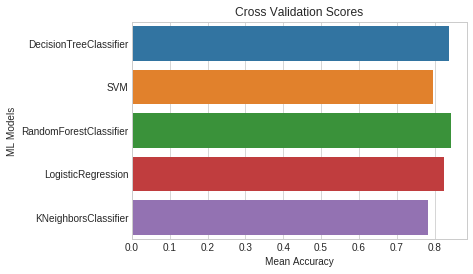

In [154]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

## Ensemble Modeling

In [155]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

0.8144329896907216
